## Variance
$$ Var(X) = E \left[ (X - \mu)^2 \right] = E[X^2] - E[X]^2 = E[X^2] - \mu^2$$

$$ Var(aX + b) = a^2Var(X) $$

Shifting a distribution by a constant b does not change the variance

[Lecture slides](https://github.com/bcaffo/Caffo-Coursera/blob/master/lecture4.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Variance of a dice roll**:

Mean: 3.507 / 3.507
Variance: 2.921 / 2.921


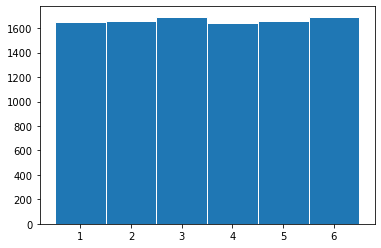

In [2]:
n = 10000
dice = np.arange(1, 7)

# Rolling a dice n times
X = np.random.randint(1, 7, n)
y = [(X==i).mean() for i in np.arange(1, 7)]

mu = np.sum([x*p for x, p in zip(dice, y)])

var = np.sum([(x-3.5)**2 * p for x, p in zip(dice, y)])

print('Mean: {:.3f} / {:.3f}'.format(mu, X.mean()))
print('Variance: {:.3f} / {:.3f}'.format(var, X.var()))

bins = np.linspace(0.5, 6.5, 7)
plt.hist(X, bins = bins, edgecolor='w')
plt.show()

Based on the intuition of an expected value being the center of mass of a mass function (or a density distribution), the variance is the center of mass of the graph below.

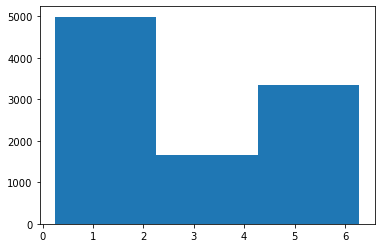

In [3]:
plt.hist((X-mu)**2, bins = 3)
plt.show()

### Covariance and Correlation
$$ Cov(X, Y) = E \left[ (X - \mu_x)(Y - \mu_y) \right] = E[XY] - \mu_x \mu_y$$

$$ |Cov(X, Y)| <= \sqrt{Var(X)Var(Y)} $$

$$ -1 < Corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X)Var(Y)}} < 1 $$

* Correlation = -1 or +1 if Y = aX + b

Some correlation examples

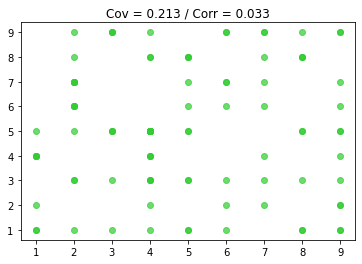

In [4]:
n = 100

x = np.random.randint(1, 10, n)
y = np.random.randint(1, 10, n)

plt.scatter(x=x, y=y, color='limegreen', alpha=0.7)
plt.title('Cov = {:.3f} / Corr = {:.3f}'.format(np.cov(x, y)[0,1], np.corrcoef(x, y)[0, 1]))
plt.show()

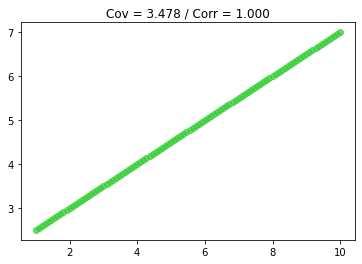

In [5]:
n = 100

x = np.linspace(1, 10, n)
y = 0.5*x + 2

plt.scatter(x=x, y=y, color='limegreen', alpha=0.7)
plt.title('Cov = {:.3f} / Corr = {:.3f}'.format(np.cov(x, y)[0,1], np.corrcoef(x, y)[0, 1]))
plt.show()

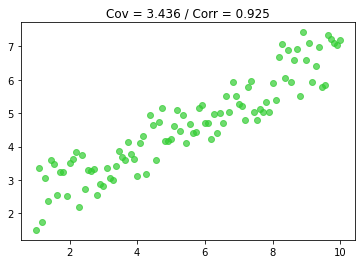

In [6]:
n = 100

x = np.linspace(1, 10, n)
noise = np.random.uniform(-1, 1, n)
y = 0.5*x + 2 + noise

plt.scatter(x=x, y=y, color='limegreen', alpha=0.7)
plt.title('Cov = {:.3f} / Corr = {:.3f}'.format(np.cov(x, y)[0,1], np.corrcoef(x, y)[0, 1]))
plt.show()

### Sample variance
Say we roll a dice 10 times and take the average of these ten values and repeat the process, what is the varance of the mean of each sample? The variance of a dice roll in general is around 2.9. The variance of the mean of n dice rolls can be given by $\frac{\sigma^2}{n}$ (see the notes for the proof).

The value $\frac{\sigma}{\sqrt{n}}$ is referred to as the **standard error** of a population of n-sized sample mean. So it is the standard deviation of the means of experiment results on n samples.

Variance from the observed values = 0.290
Variance from our knowledge of a dice roll variance = 0.290
Mean = 3.499


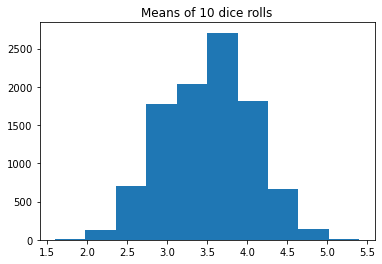

In [7]:
# Number of experiments
n = 10000
# Number of samples per experiment
d = 10

rolls = np.random.randint(1, 7, size = (n, d))
sample_avgs = rolls.mean(axis=1)

print('Variance from the observed values = {:.3f}'.format(sample_avgs.var()))
print('Variance from our knowledge of a dice roll variance = {:.3f}'.format(2.905/d))
print('Mean = {:.3f}'.format(sample_avgs.mean()))

plt.hist(sample_avgs)
plt.title('Means of {} dice rolls'.format(d))
plt.show()

Intuitively, the variance of the average of an experiment on n samples is lower than the variance of the experiment in general, i.e., on one sample.

Sample variance is computed used the following equation:
$$ S^2 = \frac{\sum_{i=1}^n \left(X_i - \bar{X}\right)^2}{n-1} $$

The sample variance is a random variable that has its own distribution. It estimates the population variance $\sigma^2$. Therefore, the expected value of the sample variance should be equal to $\sigma^2$ for it to be a good estimator. When computing the expected value of the equation above it turns out to be $\sigma^2$, whereas when dividing by n instead of n-1 the expected value will not be exactly $\sigma^2$. This is the reason behind dividing by n-1 instead of n (see the leacture notes for the proof).

The distribution of sample variances will be less biased and have more variance when dividing by n-1, whereas it would have less variance when dividing by n. The sample variance computed by dividing by n-1 is called unbiased variance.

The value $\frac{S}{\sqrt{n}}$ is the estimate of the standard error of a population of n-sample-experiment averages.